##### Étape 1 : Importer les packages
##### Étape 2 : Charger les données
##### Étape 3 : Analyse de données
##### Étape 4 : Pretraitement des donnees
##### Étape 5 : Diviser les donnees : Train et Test
##### Étape 6 : Selection au moins 4 Algorithms de Machine Learning
##### Étape 7 : Evaluer les modèles
##### Étape 8 : Faire une simple prediction

# Étape 1 : Importer les packages

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Étape 2 : Charger les données

In [12]:
data = pd.read_csv('../data/Bank.csv')

In [14]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Étape 3 : Analyse de données

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
data.shape

(45211, 17)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [20]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Étape 4 : Pretraitement des donnees

In [23]:
# Encoder les colonnes catégoriques
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in columns_to_encode:
    data[col] = encoder.fit_transform(data[col])

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [27]:
# Standardiser les colonnes numériques
scaler = StandardScaler()
columns_to_scale = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [28]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,5,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,5,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,5,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,5,8,-0.645231,-0.569351,-0.411453,-0.25194,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,5,8,-0.233620,-0.569351,-0.411453,-0.25194,3,0


# Étape 5 : Diviser les donnees : Train et Test

In [29]:
# Définir X (caractéristiques) et y (cible)
X = data.drop(columns=['y'])  # Toutes les colonnes sauf 'y'
y = data['y']  # La colonne cible

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ensemble d'entraînement :", X_train.shape)
print("Ensemble de test :", X_test.shape)

Ensemble d'entraînement : (36168, 16)
Ensemble de test : (9043, 16)


# Étape 6 : Selection au moins 4 Algorithms de Machine Learning

In [31]:
# Initialiser les modèles
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Étape 7 : Evaluer les modèles

In [32]:
# Dictionnaire pour stocker les scores
scores = {}

for name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calculer la précision
    acc = accuracy_score(y_test, y_pred)
    scores[name] = acc
    print(f"{name}: Accuracy = {acc:.2f}")

# Afficher les résultats
print("\nRésultats des modèles :", scores)

Logistic Regression: Accuracy = 0.89
Random Forest: Accuracy = 0.91
K-Nearest Neighbors: Accuracy = 0.89
Support Vector Machine: Accuracy = 0.88

Résultats des modèles : {'Logistic Regression': 0.8914077186774301, 'Random Forest': 0.9053411478491651, 'K-Nearest Neighbors': 0.8908548048214088, 'Support Vector Machine': 0.8836669246931328}


Text(0.5, 1.0, 'Matrice de confusion ')

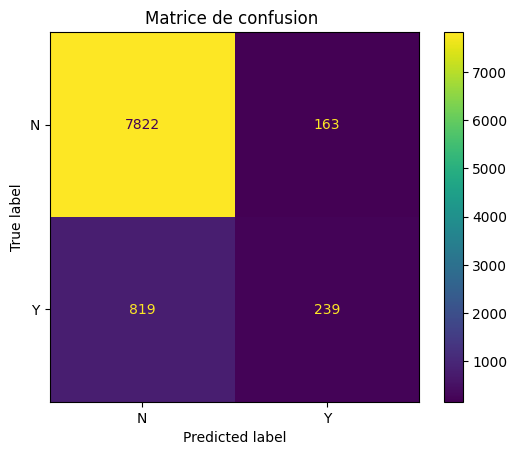

In [33]:
ConfusionMatrixDisplay.from_estimator(models['Logistic Regression'], X_test, y_test, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

Text(0.5, 1.0, 'Matrice de confusion ')

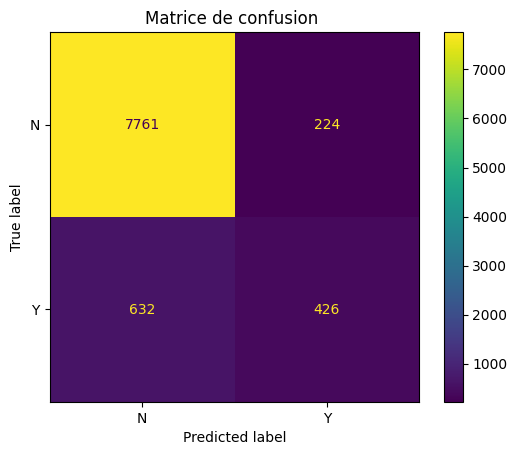

In [34]:
ConfusionMatrixDisplay.from_estimator(models['Random Forest'], X_test, y_test, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

Text(0.5, 1.0, 'Matrice de confusion ')

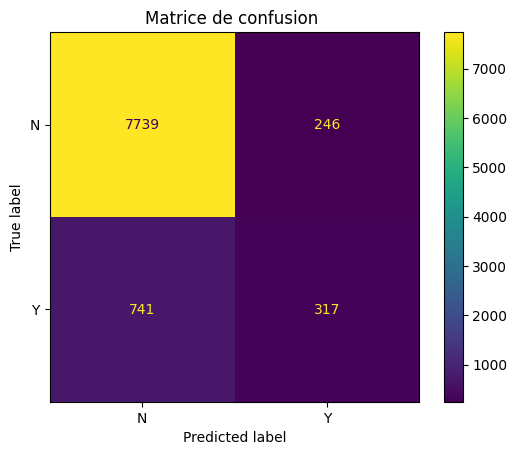

In [35]:
ConfusionMatrixDisplay.from_estimator(models['K-Nearest Neighbors'], X_test, y_test, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

Text(0.5, 1.0, 'Matrice de confusion ')

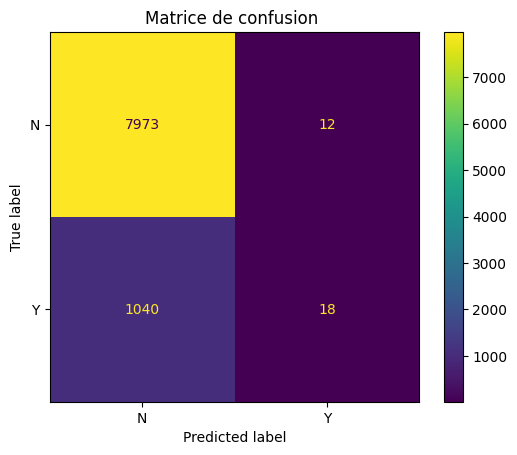

In [36]:
ConfusionMatrixDisplay.from_estimator(models['Support Vector Machine'], X_test, y_test, display_labels=['N', 'Y'])
plt.title('Matrice de confusion ')

# Étape 8 : Faire une simple prediction

In [37]:
# Exemple d'une nouvelle donnée pour prédiction
new_data = [[40, 3, 0, 1, 0, 0.5, 1, 0, 0, 15, 6, 0.2, 1, -1, 0, 1]]  # Remplacez par vos valeurs

# Prédire avec le modèle Random Forest
random_forest = models['Random Forest']
predicted = random_forest.predict(new_data)

print("Prédiction pour la nouvelle donnée :", predicted)

Prédiction pour la nouvelle donnée : [1]
